## Final Project Submission

Please fill out:
* Student name: Henry Cham
* Student pace: full time
* Scheduled project review date/time: 5/8/19
* Instructor name: Fangfang Lee
* Blog post URL:


In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
house = pd.read_csv('kc_house_data.csv')

In [10]:
house.shape

(21597, 21)

In [3]:
house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17241,1545806720,8/26/2014,254950.0,4,2.00,2180,8800,1.0,0.0,0.0,...,7,1170,?,1977,0.0,98038,47.3676,-122.046,1630,8800
8697,3876312370,9/15/2014,434500.0,3,1.75,1930,7210,1.0,0.0,0.0,...,7,1110,820.0,1975,0.0,98072,47.7350,-122.174,1870,7877
1205,194000505,9/4/2014,651000.0,3,2.00,1940,6440,1.0,0.0,2.0,...,7,970,?,1940,0.0,98116,47.5664,-122.389,1730,4640
19858,7830800473,1/14/2015,333500.0,3,2.50,2196,7475,2.0,0.0,0.0,...,8,2196,0.0,2006,0.0,98030,47.3803,-122.204,1860,6755
12723,7663700531,1/6/2015,325000.0,2,1.00,620,14823,1.0,0.0,0.0,...,6,620,0.0,1926,NaN,98125,47.7322,-122.300,1400,7930


In [43]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
house.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
house['waterfront'].fillna(house['waterfront'].median(), inplace=True)

In [26]:
house['view'].fillna(house['view'].median(), inplace=True)

In [27]:
house['yr_renovated'].fillna(house['yr_renovated'].median(), inplace=True)

In [28]:
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [73]:
house['sqft_basement'] = house['sqft_basement'].str.replace('?',str(house['sqft_basement'].mode()[0]))
house['sqft_basement'] = house['sqft_basement'].astype(float)

In [66]:
house['sale_year'] = house['date'].str[-4:].astype(int)

In [74]:
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
sale_year          int32
dtype: object

In [101]:
house['id'].duplicated().sum()

177

In [117]:
house.loc[house.duplicated(subset='id',keep=False),:].sort_values('id')[0:20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316,2015
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316,2014
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969,2014
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969,2015
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956,2014
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956,2014
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244,2014
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244,2014
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017,2015
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017,2014


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


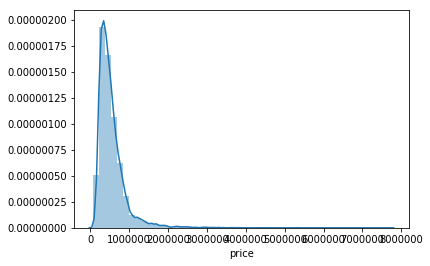

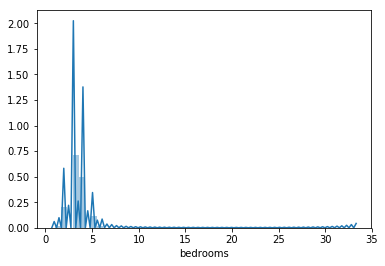

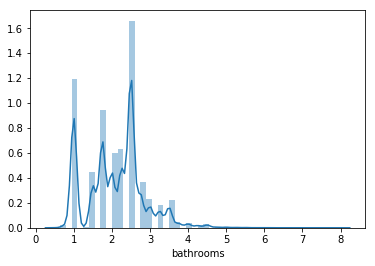

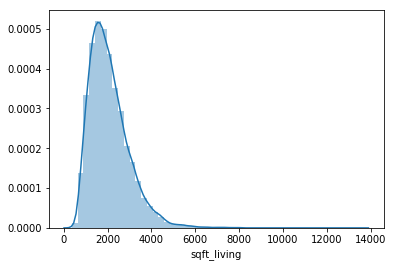

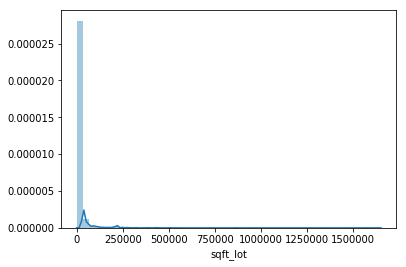

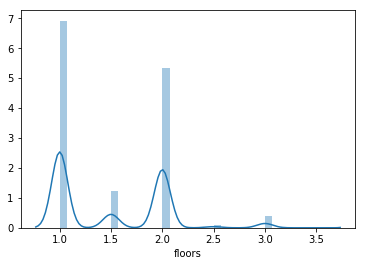

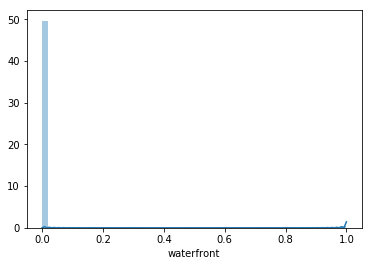

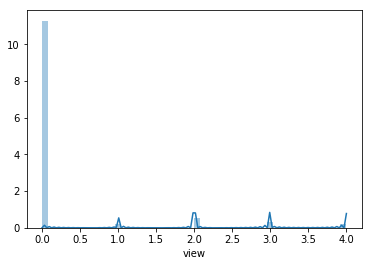

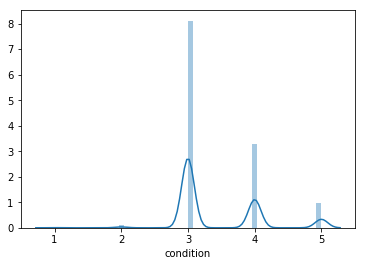

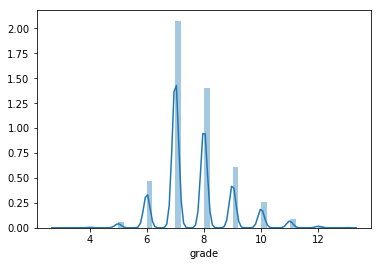

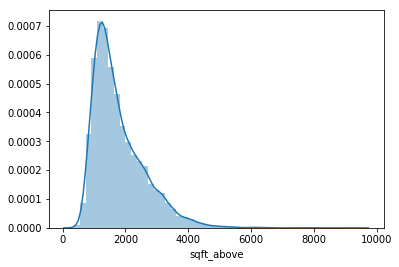

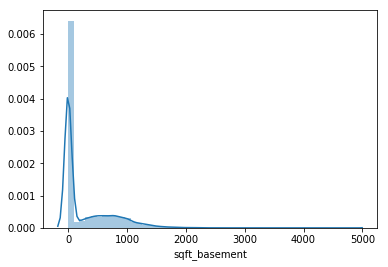

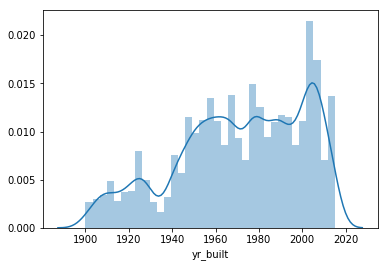

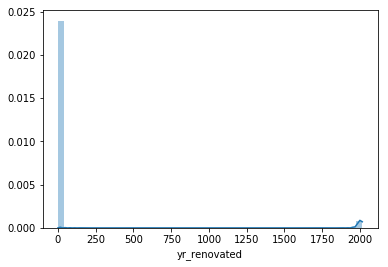

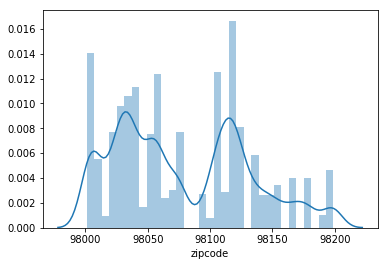

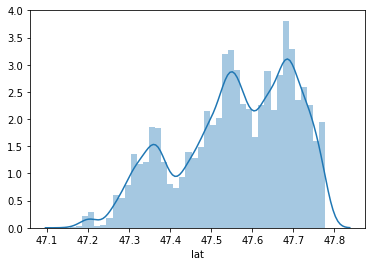

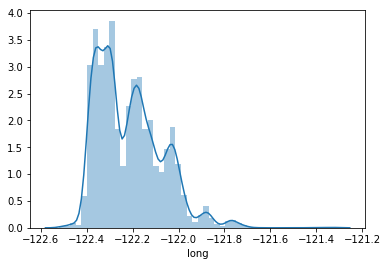

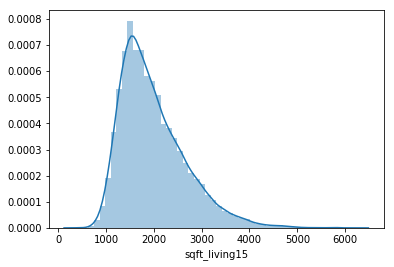

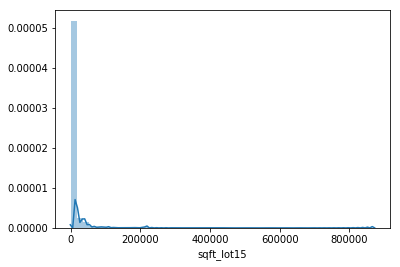

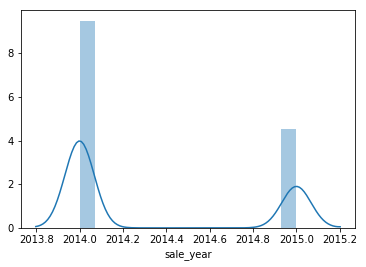

In [78]:
for i in range(2,house.shape[1]):
    plt.figure()
    print(sns.distplot(house[house.columns[i]]))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


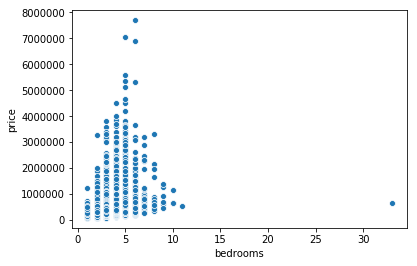

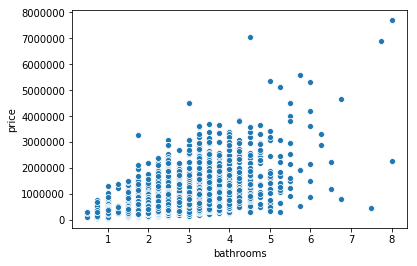

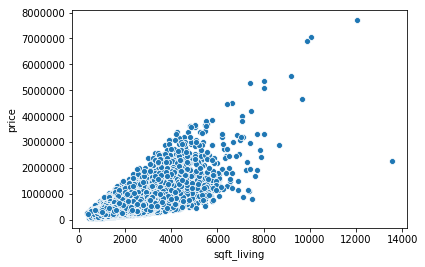

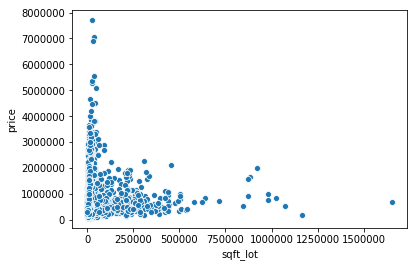

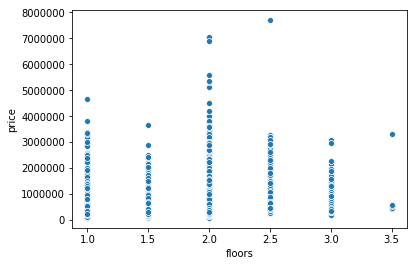

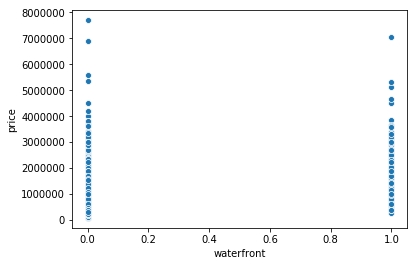

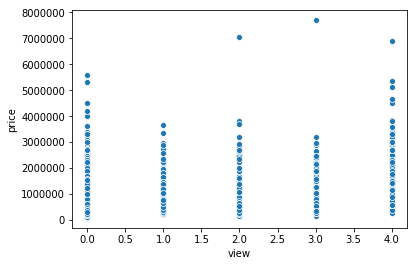

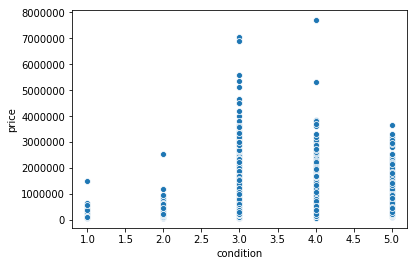

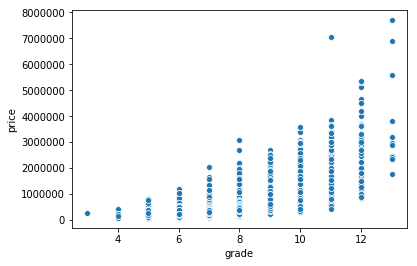

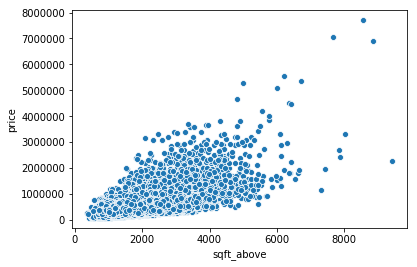

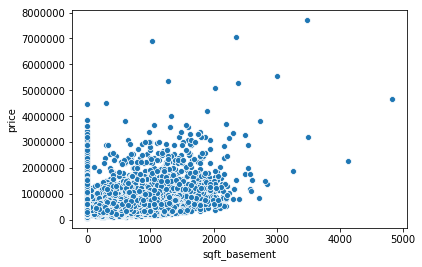

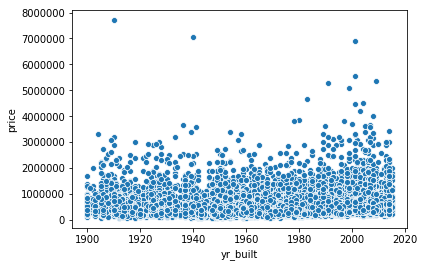

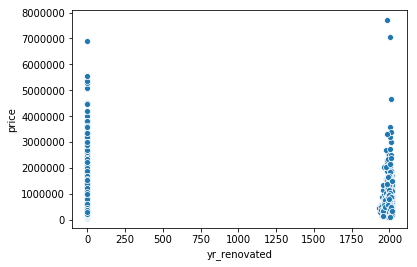

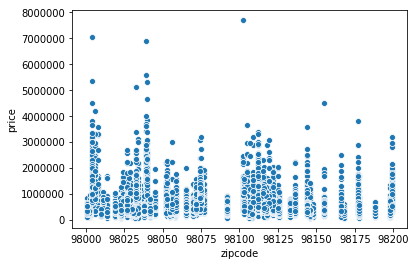

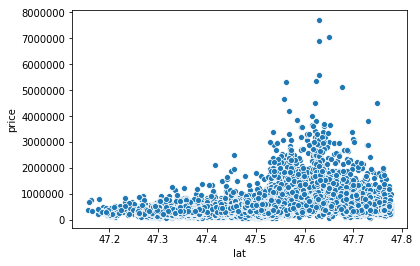

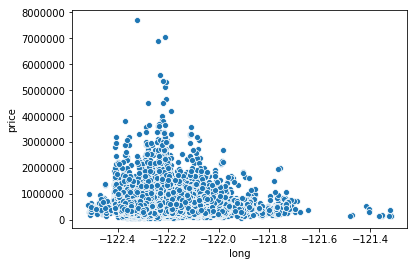

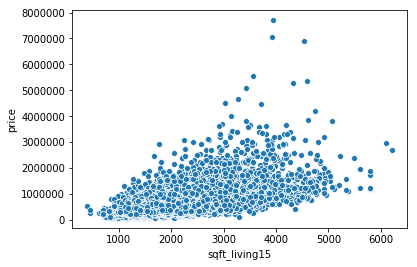

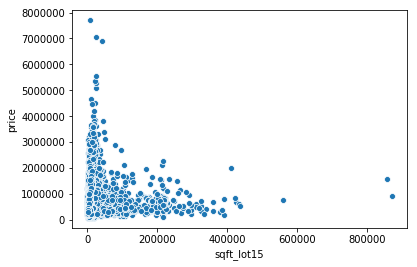

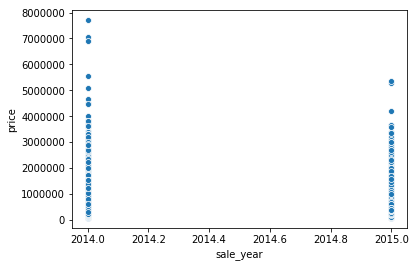

In [80]:
for i in range(3,house.shape[1]):
    plt.figure()
    print(sns.scatterplot(house[house.columns[i]],house['price']))

In [170]:
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.009915
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.003727
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.009949
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.026577
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.029014
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005628
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.022352
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,-0.005018
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.001239
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.045898


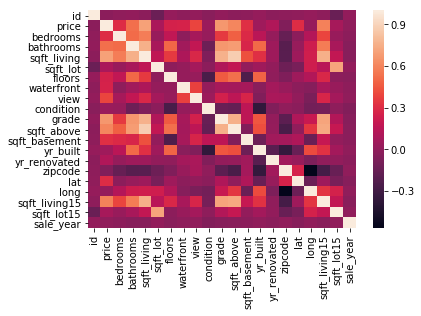

In [91]:
sns.heatmap(house.corr())

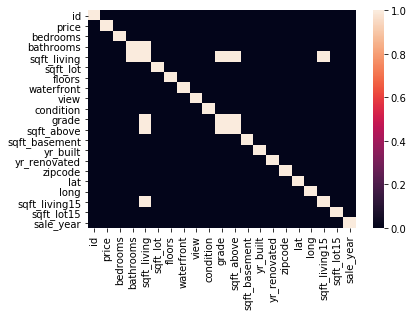

In [92]:
sns.heatmap(abs(house.corr())>.75)

In [379]:
#X = house.loc[:,~house.columns.isin(['id','date','price','sqft_living','sqft_lot','grade','zipcode'])]
X = house.loc[:,~house.columns.isin(['id','date','price','sqft_living','zipcode','sqft_lot','sqft_above'])]
X = sm.add_constant(X)
y = house.price

In [380]:
raw_model = sm.OLS(y, X).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2840.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        00:21:20   Log-Likelihood:            -2.9562e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21581   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.657e+07   6.49e+06    -13.341      0.000   -9.93e+07   -7.39e+07
bedrooms      -5919.1067   1910.105     -3.099      0.002   -9663.055   -2175.159
bathrooms      9.399e+04   3263.185     28.802      0.000    8.76e+04       1e+05
floors         2.928e+04   3731.220      7.847      0.000     2.2e+04    3.66e+04
waterfront     6.642e+05   1.92e+04     34.635      0.000    6.27e+05    7.02e+05
view           4.863e+04   2234.980     21.758      0.000    4.42e+04     5.3e+04
condition      2.957e+04   2470.128     11.971      0.000    2.47e+04    3.44e+04
grade          1.404e+05   2100.283     66.832      0.000    1.36e+05    1.44e+05
sqft_basement    55.5084      4.186     13.259      0.000      47.303      63.714
yr_built      -3051.7515     74.479    -40.975      0.000   -3197.736   -2905.767
yr_renovated     24.8662      4.211      5.905      0.000      16.613      33.120
lat            5.228e+05   1.11e+04     47.288      0.000    5.01e+05    5.44e+05
long          -4.877e+04   1.25e+04     -3.902      0.000   -7.33e+04   -2.43e+04
sqft_living15    93.2267      3.333     27.975      0.000      86.695      99.759
sqft_lot15        0.0853      0.056      1.528      0.126      -0.024       0.195
sale_year      3.013e+04   3109.510      9.688      0.000     2.4e+04    3.62e+04
==============================================================================
Omnibus:                    21280.724   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3478351.038
Skew:                           4.417   Prob(JB):                         0.00
Kurtosis:                      64.541   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
from statsmodels.tools.eval_measures import rmse

# now generate predictions
ypred = raw_model.predict(X)

# calc rmse
raw_rmse = rmse(y, ypred)
print(raw_rmse)

209905.39427521502


AxesSubplot(0.125,0.125;0.775x0.755)


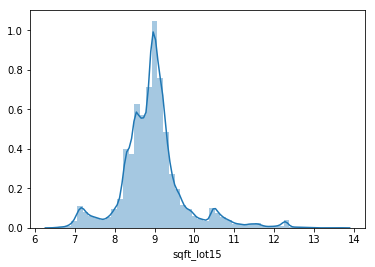

In [169]:
print(sns.distplot(house['sqft_lot15'].transform(np.log)))

In [152]:
transform_house['log_sqft_above'] = house['sqft_above'].transform(np.log)
transform_house['log_sqft_living15'] = house['sqft_living15'].transform(np.log)
transform_house['log_sqft_lot15'] = house['sqft_lot15'].transform(np.log)
transform_house.drop(['sqft_above','sqft_living15','sqft_lot15'],axis=1,inplace=True)



In [153]:
transform_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sale_year,log_sqft_above,log_sqft_living15,log_sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,2014,7.073270,7.200425,8.639411
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,2014,7.682482,7.432484,8.941022
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2015,6.646391,7.908387,8.994917
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,2014,6.956545,7.215240,8.517193
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,2015,7.426549,7.495542,8.923058


In [345]:
X = transform_house.loc[:,~transform_house.columns.isin(['id','date','price','sqft_living','sqft_lot','grade','zipcode'])]
X = sm.add_constant(X)
y = transform_house.price

In [346]:
transform_model = sm.OLS(y, X).fit()
transform_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2271.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        00:16:27   Log-Likelihood:            -2.9716e+05
No. Observations:               21597   AIC:                         5.944e+05
Df Residuals:                   21581   BIC:                         5.945e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.078e+08   6.99e+06    -15.423      0.000   -1.22e+08   -9.41e+07
bedrooms          -4.355e+04   2186.242    -19.918      0.000   -4.78e+04   -3.93e+04
bathrooms          9.333e+04   3645.745     25.599      0.000    8.62e+04       1e+05
floors             1.224e+04   4409.873      2.775      0.006    3594.356    2.09e+04
waterfront         6.407e+05   2.06e+04     31.041      0.000       6e+05    6.81e+05
view               6.483e+04   2383.302     27.203      0.000    6.02e+04    6.95e+04
condition          2.904e+04   2653.963     10.941      0.000    2.38e+04    3.42e+04
sqft_basement       150.3872      4.838     31.083      0.000     140.904     159.871
yr_built          -2076.1975     78.807    -26.345      0.000   -2230.664   -1921.731
yr_renovated         25.6744      4.523      5.677      0.000      16.810      34.539
lat                6.568e+05   1.18e+04     55.610      0.000    6.34e+05     6.8e+05
long              -1.642e+05   1.37e+04    -11.990      0.000   -1.91e+05   -1.37e+05
sale_year          2.825e+04   3339.613      8.459      0.000    2.17e+04    3.48e+04
log_sqft_above     3.783e+05   7744.674     48.849      0.000    3.63e+05    3.94e+05
log_sqft_living15  1.729e+05   7643.688     22.619      0.000    1.58e+05    1.88e+05
log_sqft_lot15    -9563.7230   2489.571     -3.842      0.000   -1.44e+04   -4683.979
==============================================================================
Omnibus:                    19822.655   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2328636.273
Skew:                           4.010   Prob(JB):                         0.00
Kurtosis:                      53.233   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

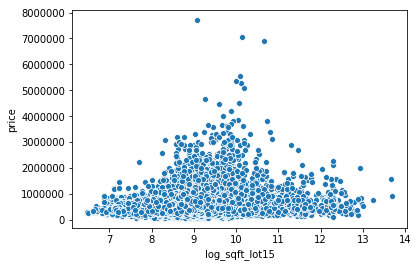

In [343]:
sns.scatterplot(transform_house['log_sqft_lot15'],transform_house['price'])

In [323]:
house.groupby('floors')['price'].mean()

floors
1.0    4.423584e+05
1.5    5.590449e+05
2.0    6.491856e+05
2.5    1.061021e+06
3.0    5.834339e+05
3.5    9.102143e+05
Name: price, dtype: float64

In [324]:
house['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [388]:
dummies_house = house.copy()

In [389]:
floor_dummies = pd.get_dummies(house['floors'],prefix='floor')
view_dummies = pd.get_dummies(house['view'],prefix='view')

dummies_house = pd.concat([house,floor_dummies,view_dummies,],axis=1)
dummies_house.drop(['floors','view'],axis=1,inplace=True)

In [390]:
dummies_house.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,...,floor_1.5,floor_2.0,floor_2.5,floor_3.0,floor_3.5,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0
8859,3629960600,3/12/2015,350000.0,3,1.75,1260,1111,0.0,3,8,...,0,1,0,0,0,1,0,0,0,0
16907,1787600190,4/3/2015,353000.0,2,1.00,1100,7500,0.0,3,7,...,0,0,0,0,0,1,0,0,0,0
498,9274202270,8/18/2014,625000.0,2,1.50,1490,5750,0.0,4,7,...,1,0,0,0,0,1,0,0,0,0
12325,3754500566,11/20/2014,749950.0,4,2.50,2370,2971,0.0,3,9,...,0,1,0,0,0,0,0,1,0,0
5735,2597000006,3/9/2015,347500.0,3,1.50,1180,8353,0.0,3,7,...,0,0,0,0,0,1,0,0,0,0


In [393]:
X = dummies_house.loc[:,~dummies_house.columns.isin([
    'id','date','price','sqft_living',
    'sqft_lot','zipcode','grade',
    'floor_1.5','floor_2.0','view_0.0'])]
X = sm.add_constant(X)
y = dummies_house.price

In [394]:
transform_model = sm.OLS(y, X).fit()
transform_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2095.
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        00:26:06   Log-Likelihood:            -2.9539e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21575   BIC:                         5.910e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.079e+08   6.43e+06    -16.777      0.000    -1.2e+08   -9.53e+07
bedrooms      -4.421e+04   1967.765    -22.467      0.000   -4.81e+04   -4.04e+04
bathrooms      5.979e+04   3368.195     17.751      0.000    5.32e+04    6.64e+04
waterfront     5.389e+05   2.14e+04     25.220      0.000    4.97e+05    5.81e+05
condition      3.441e+04   2445.728     14.070      0.000    2.96e+04    3.92e+04
sqft_above      245.5650      3.551     69.147      0.000     238.604     252.526
sqft_basement   173.9667      4.486     38.778      0.000     165.173     182.760
yr_built      -1793.8510     72.740    -24.661      0.000   -1936.427   -1651.275
yr_renovated     31.5840      4.162      7.588      0.000      23.426      39.742
lat            6.281e+05   1.09e+04     57.628      0.000    6.07e+05    6.49e+05
long          -1.884e+05   1.24e+04    -15.171      0.000   -2.13e+05   -1.64e+05
sqft_living15    75.7663      3.447     21.978      0.000      69.009      82.523
sqft_lot15       -0.3117      0.056     -5.591      0.000      -0.421      -0.202
sale_year      2.893e+04   3076.566      9.403      0.000    2.29e+04     3.5e+04
floor_1.0      8430.2622   3808.122      2.214      0.027     966.061    1.59e+04
floor_2.5      1.673e+05   1.69e+04      9.912      0.000    1.34e+05       2e+05
floor_3.0      7.832e+04   9429.119      8.306      0.000    5.98e+04    9.68e+04
floor_3.5      2.214e+05   7.98e+04      2.776      0.006    6.51e+04    3.78e+05
view_1.0       1.084e+05   1.19e+04      9.124      0.000    8.51e+04    1.32e+05
view_2.0       8.064e+04   7193.107     11.211      0.000    6.65e+04    9.47e+04
view_3.0       1.567e+05   9856.398     15.903      0.000    1.37e+05    1.76e+05
view_4.0       3.155e+05   1.49e+04     21.203      0.000    2.86e+05    3.45e+05
==============================================================================
Omnibus:                    16407.534   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1095894.830
Skew:                           3.089   Prob(JB):                         0.00
Kurtosis:                      37.346   Cond. No.                     1.35e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""